# Scoring Comparison
To understand the magnatude of changes, you can compare multiple snapshots of a case against each other.  The final visualization shows you a histogram of your snapshots overlaid with each other so you can see how your individual query scorers changed.
This visualization assumes you are using the same scorer and query set for all the snapshots.   It also assumes the snapshots come from the same case!

Please copy this example and customize it for your own purposes!

### Imports

In [1]:
from js import fetch
import pandas as pd
from datetime import datetime
import random
from matplotlib import pyplot
%matplotlib inline

## Define the Data You Want

In [2]:
CASE_ID = 6789   # Your Case
SNAPSHOT_IDS = [2471,2473]   # Your Snapshots.  Use the Compare Snapshot function in Quepid to see what the specific ID's are of your snapshots.

### Pull data directly from Quepid's snapshot repository

In [3]:

# Retrieve from Quepid API all the snapshots
snapshots = []
for snapshot_id in SNAPSHOT_IDS:
    res = await fetch(f'/api/cases/{CASE_ID}/snapshots/{snapshot_id}.json')
    snapshots.append(await res.json())

### Read in data to a dataframe

In [4]:
queryData = []
snapshotNames = {}

for snapshot in snapshots:
    queryToScoreDict = {}
    queryToNumFoundDict = {}
    snapshotNames[snapshot.id] = snapshot.name
    for snapshotScore in snapshot.scores:
        queryToScoreDict[snapshotScore.query_id] = snapshotScore.score
        queryToNumFoundDict[snapshotScore.query_id] = snapshotScore.number_of_results
    for snapshotQuery in snapshot.queries:
        queryData.append({'snapshot_id':snapshot.id, 'query':snapshotQuery.query_text, 'numfound':queryToNumFoundDict[snapshotQuery.query_id], 'score':queryToScoreDict[snapshotQuery.query_id]})
    
df = pd.DataFrame(queryData)
df

,snapshot_id,query,numfound,score
0,2471,projector screen,1,1
1,2471,notebook,1,1
2,2471,iphone 8,1,1
3,2471,printer,1,1
4,2471,computer,1,1
...,...,...,...,...
265,2473,windows 10,1,1
266,2473,microwave,1,1
267,2473,bluetooth speakers,1,1
268,2473,coffee,1,1


## Create a histogram to compare snapshots

The snapshots that are represented in fill color.

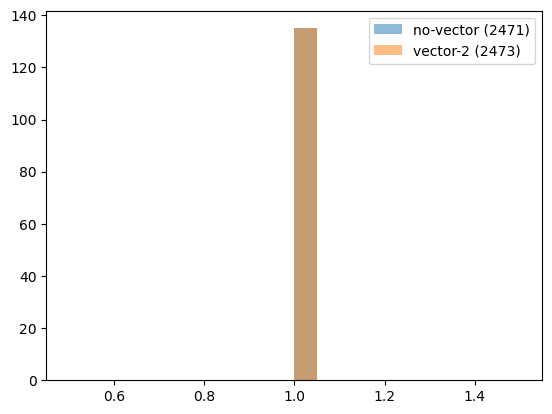

In [5]:
for snapshot_id in SNAPSHOT_IDS:
    pyplot.hist(df.loc[df['snapshot_id'] == snapshot_id]['score'], 20, alpha=0.5, label=f'{snapshotNames[snapshot_id]} ({snapshot_id})')
pyplot.legend(loc='upper right')
pyplot.show()

_This notebook was last updated 16-FEB-2024_